# STORI DATA CHALLENGE

 Samantha Ximena Garcia Oros

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Stori_Data_Challenge.csv',index_col='cust_id')
df

,Unnamed: 0,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
cust_id,,,,,,,,,,,,,,,,,,,,,
C10001,1,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
C10002,2,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
C10003,3,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
C10004,4,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
C10005,5,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,8946,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
C19187,8947,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
C19188,8948,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0


### Dataset Exploration

In [11]:
print("Shape of dataset:", df.shape)


Shape of dataset: (8950, 21)


In [12]:
print("\nData types:\n", df.dtypes)


Data types:
 Unnamed: 0                            int64
activated_date                       object
last_payment_date                    object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
fraud                                 int64
dtype: object


In [13]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0                            0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64


In [14]:
print("\nSummary statistics:\n", df.describe())



Summary statistics:
         Unnamed: 0       balance  balance_frequency     purchases  \
count  8950.000000   8948.000000        8950.000000   8950.000000   
mean   4475.500000   1564.612804           0.877271   1003.204834   
std    2583.786788   2081.735635           0.236904   2136.634782   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.250000    128.234272           0.888889     39.635000   
50%    4475.500000    873.385231           1.000000    361.280000   
75%    6712.750000   2054.525476           1.000000   1110.130000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       oneoff_purchases  installments_purchases  cash_advance  \
count       8950.000000             8950.000000   8838.000000   
mean         592.437371              411.067645    978.980630   
std         1659.887917              904.338115   2099.762588   
min            0.000000                0.000000      0.000000   
25%            0.000000        

In [15]:
# Clean Dataset

df_clean = df.copy()


df_clean = df_clean.dropna(subset=['balance', 'credit_limit'])

df_clean['cash_advance'].fillna(0, inplace=True)
df_clean['minimum_payments'].fillna(df_clean['minimum_payments'].median(), inplace=True)


df_clean['activated_date'] = pd.to_datetime(df_clean['activated_date'], errors='coerce')
df_clean['last_payment_date'] = pd.to_datetime(df_clean['last_payment_date'], errors='coerce')


df_clean = df_clean.dropna(subset=['activated_date'])


df_clean['activated_year'] = df_clean['activated_date'].dt.year
df_clean['activated_month'] = df_clean['activated_date'].dt.month


df_clean.reset_index(drop=True, inplace=True)


print("Cleaned dataset shape:", df_clean.shape)


Cleaned dataset shape: (8934, 23)


## Histogram Plot

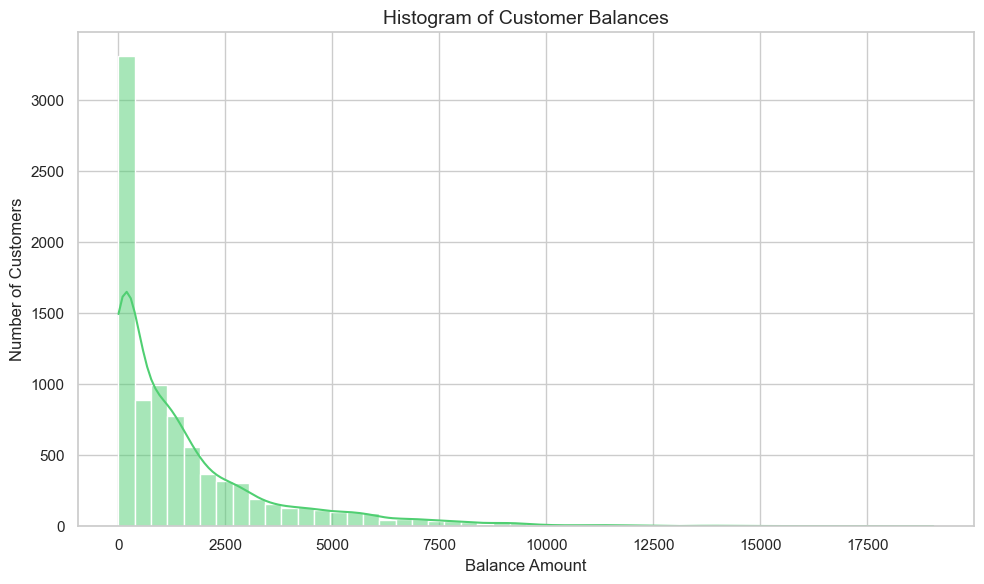

In [31]:
custom_colors = ['#50cf72', '#35fe6c', '#DAF7A6']
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(custom_colors))


plt.figure(figsize=(10, 6))
sns.histplot(df_clean['balance'], bins=50, kde=True)
plt.title('Histogram of Customer Balances', fontsize=14)
plt.xlabel('Balance Amount')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


### Observations

* Strong Right Skew

This plot shows that most of the customers have balances clustered on the lower end of the distribution (under  5,000), the highest concentration of customers is located in the balance value between  0 and  $2,000. Moreover, the long right tail indicates a small number of customers with very high balance. This might mean that most of the people in this dataset may either use their credit cards conservatively or have lower credit limits.

The thin upper tail shows us that customers with balances above $10,000 are relatively rare, but this dataset might be built over higher credit risk customers implying that their credit limit has to be lower to smooth the potential risk that these credit holders might represent, or the customers are power users with large credit limits.

Another thing we can observe from this graph is the lack of clear modes, the plot is showing us a fairly smooth distribution without sharp spikes, this indicates a continuous, varied behavior rather than distinct segments. The lack of modes could reflect that the customer base have diverse financial habits implying that the personification of financial products might be more effective than just offering one product hoping it fits all clients needs.


### Hypotheses

* Credit Use

The plot is showing us a tendency where customers may not use credit heavily, this might have different interpretations; either customers have low credit needs, they are new customers with low credit limits or maybe consumers have more than one credit card that they use in a diverse manner.

* Long Tail

The long right tail in the histogram shows a small group of users with very high balances carrying large outstanding amounts, meaning that if they do not pay their full credit card balance (revolving balance) they could be  generating an interest income for the issuer; this could be a profitable situation for the issuer if they have a well managed risk. On the other hand, this could also mean that the issuer might be over-leveraged implying that these customers are more likely to default if financial pressure increases, so it is important to have a closer monitoring or a more limited credit strategy to smooth the risk they represent. In conclusion, we are having Pareto behavior, where a small percentage of customers have a concentrated percentage of revenue (or risk if not managed properly). 

The following Pareto curve plot shows the mentioned behavior, with the top 33.37% of customers holding 80% of the total balance


In [27]:
df_sorted = df_clean.sort_values(by='balance', ascending=False).reset_index(drop=True)

df_sorted['cumulative_balance'] = df_sorted['balance'].cumsum()
df_sorted['customer_pct'] = (df_sorted.index + 1) / len(df_sorted)
df_sorted['balance_pct'] = df_sorted['cumulative_balance'] / df_sorted['balance'].sum()

pareto_cutoff = df_sorted[df_sorted['balance_pct'] >= 0.80].iloc[0]['customer_pct']
print(f"Top {pareto_cutoff:.2%} of customers hold 80% of total balance")



Top 33.37% of customers hold 80% of total balance


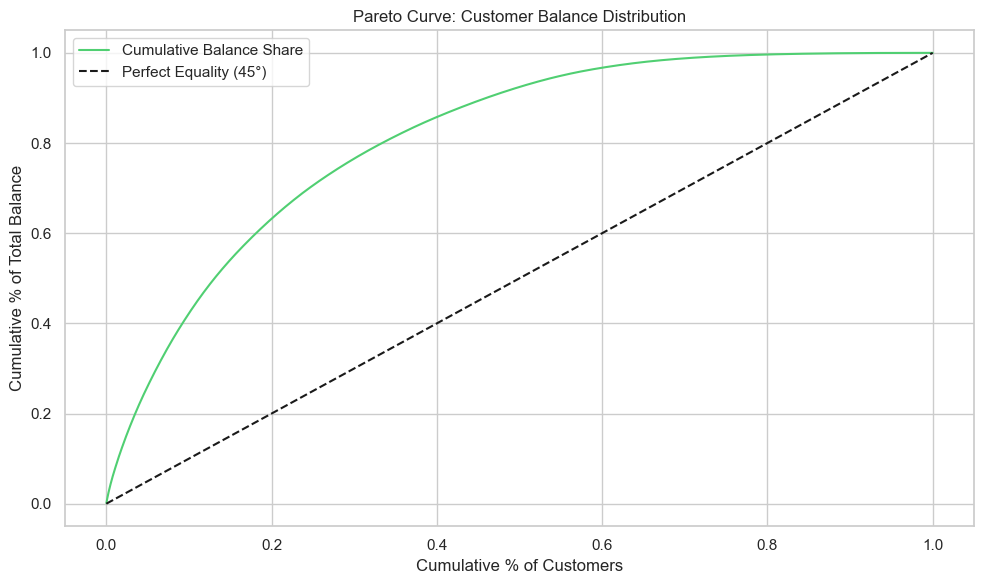

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['customer_pct'], df_sorted['balance_pct'], color='#50cf72', label='Cumulative Balance Share')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Equality (45°)')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Total Balance')
plt.title('Pareto Curve: Customer Balance Distribution')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Mean and Median Balance 

In [42]:
balance_stats = df_clean.groupby(['activated_year', 'activated_month'])['balance'].agg(['mean', 'median']).reset_index()
balance_stats.columns = ['Activation Year', 'Activation Month', 'Mean Balance', 'Median Balance']

styled_table = balance_stats.style\
    .format({'Mean Balance': "{:,.2f}", 'Median Balance': "{:,.2f}"})\
    .set_caption("Mean and Median Customer Balances by Activation Year and Month")\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#50cf72'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid #ccc'), ('padding', '8px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])\
     .hide(axis="index")

styled_table



Activation Year,Activation Month,Mean Balance,Median Balance
2019,10,"2,482.23","1,524.41"
2019,11,"1,848.70","1,082.07"
2019,12,"2,018.79","1,162.59"
2020,1,"1,854.54","1,175.75"
2020,2,"1,747.35",994.84
2020,3,"1,556.63",830.52
2020,4,"1,483.18",910.14
2020,5,"1,214.33",734.56
2020,6,940.00,472.79
2020,7,649.72,221.29


The highest average is from the first period (October 2019) with a mean of 2,482 and a median of $1,524. From there the following periods' mean and median balances have a tendency of declining over time.

Another thing we can observe is that in every month the mean balance is higher than the median, this means that we have a right-skewed distribution, these numbers can confirm the previous affirmation we made with the Histogram plot: we have few customers with very high balances that are pulling the average up. So for the context of this analysis the median will be a more reliable and stable measure than the mean.

Talking about the tendency of declining balance we can think of customers who joined in late 2019 may had either higher credit limits or a more aggressive usage of the credits; while customers who joined in 2020 showed lower average balances, this might suggest a pandemic-related more cautious spending or that the issuer made a shift in credit policy (also possibly pandemic related).


## Report Table

In [63]:
original_df = pd.read_csv("Stori_Data_Challenge.csv")
cust_ids = original_df[['cust_id']].copy().reset_index(drop=True)
df_clean = df_clean.reset_index(drop=True)
df_clean['cust_id'] = cust_ids['cust_id']

report_df = df_clean[
    (df_clean['activated_date'].dt.year == 2020) &
    (df_clean['last_payment_date'].dt.year == 2020)
].copy()

report_df['cust_id'] = report_df['cust_id'].astype(str).str.extract('(\d+)')

report_df['activated_date'] = report_df['activated_date'].dt.strftime('%Y-%m')
report_df['last_payment_date'] = report_df['last_payment_date'].dt.strftime('%Y-%m-%d')

report_df['cash_adv_pct_of_limit'] = (report_df['cash_advance'] / report_df['credit_limit']) * 100
report_df['cash_adv_pct_of_limit'] = report_df['cash_adv_pct_of_limit'].round(2)

report_df = report_df[[
    'cust_id', 'activated_date', 'last_payment_date',
    'cash_advance', 'credit_limit', 'cash_adv_pct_of_limit'
]]


report_df = report_df.head(25)

styled_report = report_df.style\
    .format({
        'cash_advance': "{:,.2f}",
        'credit_limit': "{:,.2f}",
        'cash_adv_pct_of_limit': "{:.2f}%"
    })\
    .set_caption("Customers Activated and Paid in 2020")\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#50cf72'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid #ccc'), ('padding', '8px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])\
    .hide(axis="index")

styled_report


cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_adv_pct_of_limit
12555,2020-01,2020-05-08,"2,431.29","8,000.00",30.39%
12556,2020-01,2020-05-26,0.00,"2,000.00",0.00%
12557,2020-01,2020-10-20,0.00,"3,000.00",0.00%
12558,2020-01,2020-08-22,0.00,"9,000.00",0.00%
12559,2020-01,2020-04-26,78.76,"1,500.00",5.25%
12560,2020-01,2020-10-16,0.00,"4,000.00",0.00%
12561,2020-01,2020-05-06,"2,260.74","9,000.00",25.12%
12562,2020-01,2020-08-13,611.97,"3,500.00",17.48%
12563,2020-01,2020-08-28,0.00,"9,000.00",0.00%
12564,2020-01,2020-07-15,"4,200.99","9,000.00",46.68%


## Fraud Predictive Model 

For doing the fraud predictive model I will use a Random Forest. A logistic regression assumes linearity and fraud patterns are often non-linear and complex, meanwhile random forests capture interactions and non-linearities automatically; moreover, they are resistant to overfitting.

Classification Report:
               precision    recall  f1-score   support

           0     0.9959    0.9996    0.9977      2660
           1     0.9091    0.4762    0.6250        21

    accuracy                         0.9955      2681
   macro avg     0.9525    0.7379    0.8114      2681
weighted avg     0.9952    0.9955    0.9948      2681

Confusion Matrix:
 [[2659    1]
 [  11   10]]


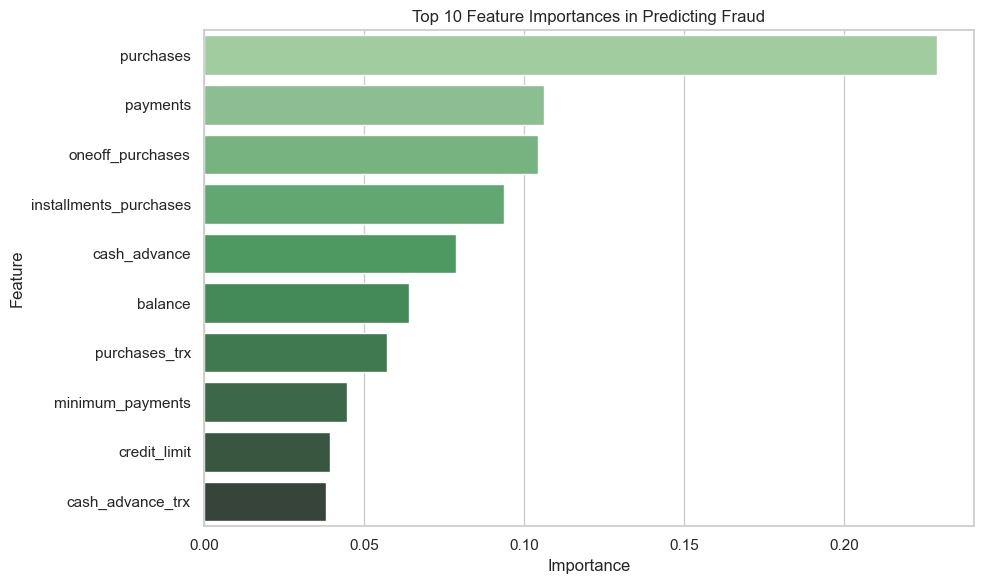

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_clean.drop(columns=['fraud', 'activated_date', 'last_payment_date'], errors='ignore')
X = X.select_dtypes(include=['float64', 'int64'])  # keep only numeric features
y = df_clean['fraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="Greens_d")
plt.title("Top 10 Feature Importances in Predicting Fraud")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Interpretation

*   CLASSIFICATION REPORT

We can appreciate that our model has a 99.63% of precision, 99.96% of recall and 99.79% of F1-Score for the non fraudulent customers, meaning almost all predicted non-frauds where correct, almost every actual non-fraud was detected and that there were an excellent  balance between precision and recall.

However, looking at the numbers for fraudulent customers we have a 91.67% of precision, 52.38% of recall and 66.67% of F1-score. so our model when it predicts fraud it is usually correct but it misses almost half of real frauds, this could be due to that there were only 21 fraud cases in the test set

*   CONFUSION MATRIX

In our confusion matrix we had only one incorrectly predicted fraud when it wasn't but we had 10 False negatives, meaning 10 missed actual fraud cases.

These results tell us that the model is very strong at spotting non fraud cases but it misses about half of the real frauds

For correcting the fraud predictions I would like to try an undersampling by randomly dropping non-fraud cases to balance the dataset.

Classification Report:
               precision    recall  f1-score   support

           0     0.9000    0.8571    0.8780        21
           1     0.8571    0.9000    0.8780        20

    accuracy                         0.8780        41
   macro avg     0.8786    0.8786    0.8780        41
weighted avg     0.8791    0.8780    0.8780        41

Confusion Matrix:
 [[18  3]
 [ 2 18]]


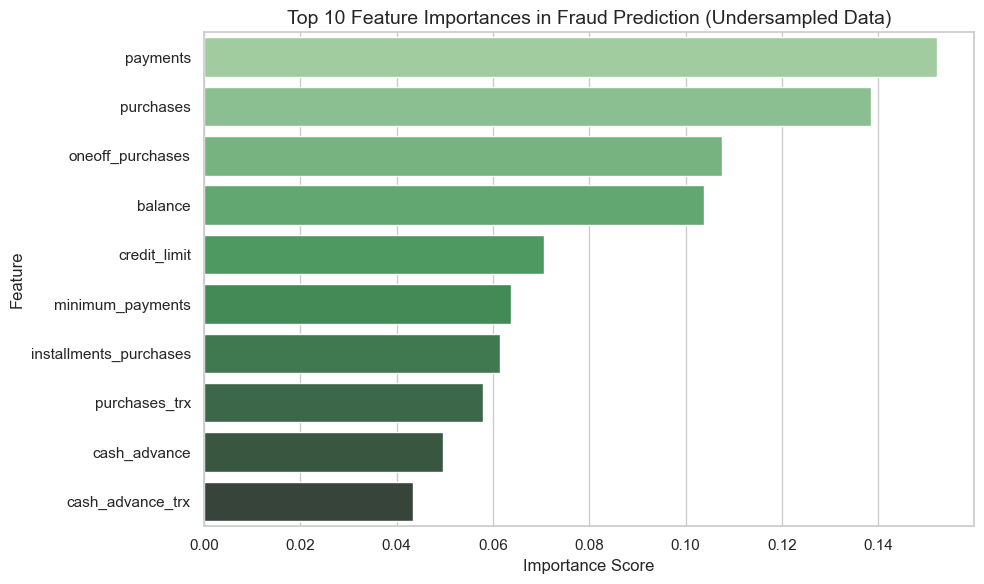

In [57]:
df = pd.read_csv("Stori_Data_Challenge.csv")
df['activated_date'] = pd.to_datetime(df['activated_date'], errors='coerce')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], errors='coerce')
df_clean = df.dropna()

df_majority = df_clean[df_clean.fraud == 0]
df_minority = df_clean[df_clean.fraud == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=len(df_minority), 
                                   random_state=42)

df_undersampled = pd.concat([df_majority_downsampled, df_minority])
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_undersampled.drop(columns=['fraud', 'activated_date', 'last_payment_date'], errors='ignore')
X = X.select_dtypes(include=['float64', 'int64'])
y = df_undersampled['fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="Greens_d")
plt.title("Top 10 Feature Importances in Fraud Prediction (Undersampled Data)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


With the undersampling we have a much better recall report on fraud predictions with a 90% and the precision and F1-scores for both classes are very balanced. Overall the accuracy is slightly lower but the importance here is the balance in recall for predicting fraud and not fraud.

We can also notice that with this new training the most powerful predictor for fraud now is payments instead of purchases. Even though the top variables are still the same, in the following table we can appreciate that they changed their original ranking.


In [61]:
X_orig = df_clean.drop(columns=['fraud', 'activated_date', 'last_payment_date'], errors='ignore')
X_orig = X_orig.select_dtypes(include=['float64', 'int64'])
y_orig = df_clean['fraud']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.3, stratify=y_orig, random_state=42)

model_orig = RandomForestClassifier(n_estimators=100, random_state=42)
model_orig.fit(X_train_orig, y_train_orig)

importances_under = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances_orig = pd.Series(model_orig.feature_importances_, index=X_orig.columns).sort_values(ascending=False)

comparison_df = pd.DataFrame({
    'Undersampled': importances_under,
    'Original': importances_orig
}).sort_values(by='Undersampled', ascending=False).head(10)

styled_table = comparison_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#50cf72'), ('color', 'black')]}
]).format(precision=4)

styled_table


,Undersampled,Original
payments,0.1522,0.1405
purchases,0.1385,0.1941
oneoff_purchases,0.1076,0.1233
balance,0.1039,0.0549
credit_limit,0.0706,0.0393
minimum_payments,0.0638,0.0334
installments_purchases,0.0614,0.0710
purchases_trx,0.0579,0.0477
cash_advance,0.0496,0.1159
cash_advance_trx,0.0434,0.0500


*  Payments

This variable represents the total amount paid, it is the most powerful explanatory variable of the predictive model, this variable may matter because fraudulent accounts constantly avoid making payments or suddenly make unusual ones to manipulate the accounts’ status. They might show rare behavioral signals such as delayed payments, suddenly high or extremely low ones.

*  Purchases

Even though when doing the undersampling modeling the “Purchases” variable changed its ranking from the first to the second most powerful explanatory model it is still relevant as customers who tend to commit fraud often test stolen cards doing small purchases and then escalate to larger ones once they validate the credit cards. They might show rare behavioral signals when there are very high purchase spikes.

*  oneoff_purchases

This variable represents single large transactions and its ranking stayed in the same position in the original and in the undersampled model. This variable represents single large transactions. This variable matters as fraudulent behavior often includes big one-time charges rather than a continuous use of the credit cards, showing a rare behavioral signal when there is a high one-off purchase compared to the total activity of the credit card user.


## Conclusion

As we can see in the variable predictors ranking the key behavioral features are the strongest ones, showing us that the way a customer makes transactions gives more insights of fraud patterns and behavioral anomalies than static attributes like credit limit. 

It is important to start monitoring not only the payment amount, but also the timing, frequency and consistency of payments such as sudden payment drop-offs.

Although understanding the behavioral and financial signatures that distinguish fraudulent activity from normal customers’ behavior is key, it is equally important to design risk scoring mechanisms as a strategy to prevent fraud.
